In [131]:
import pandas as pd

In [132]:
data = pd.read_csv("./dataset/data.csv")

data.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_12196\23305055.py:1: DtypeWarning: Columns (35,55) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./dataset/data.csv")


,NO,Current Date,Eligible,Every Day,Smoking Month,Smoking Year,Age,Uses App,Stop Date 30,Serious Quit Attempt,...,Year Month Day Quit Date 7d,Year Month Day Quit Date 1m,Year Month Day Quit Date 6m,Interval Target Quit Date to Quit Day 7 Days,Interval Base to Quit Day 7 Days,Interval Base to Quit Day 7 01,Interval Target Quit Date to Quit Day 1 Month,Interval Target Quit Date to Quit Day 6 Months,Uses Substitutes 07x,Unnamed: 149
0,0,2.019040e+11,Y,1,1.0,1997.0,37,1,20190415,1,...,159430.0,NaN,NaN,1.0,6.0,1.0,NaN,NaN,0.0,NaN
1,1,2.019040e+11,Y,1,7.0,1997.0,41,1,20190410,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,2,2.019040e+11,Y,1,1.0,2012.0,25,1,20190410,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2.019040e+11,Y,1,1.0,2004.0,31,1,20190410,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2.019040e+11,Y,1,2.0,1995.0,60,1,20190413,1,...,NaN,153103.0,NaN,NaN,NaN,NaN,-6324.0,NaN,0.0,NaN


In [133]:
data.drop(columns=['NO'],inplace=True)

In [134]:
predictive_features = [
    "Cigarettes Per Day",                # Jumlah rokok yang dihisap per hari
    "Minutes",                           # Waktu untuk rokok pertama
    "Uses Substitutes",                  # Penggunaan obat nikotin
    "Electronic Cigarette Use",          # Penggunaan rokok elektronik
    "Gender",                            # Jenis kelamin
    "Age",                               # Usia
    "Smoking Interval Years",            # Jumlah tahun merokok
    "Depressed",                         # Status depresi
    "Smokes Other",                      # Penggunaan produk tembakau lainnya
    "No Pleasure",               	     # Hilangnya kesenangan terhadap sesuatu 
    'Smoked Last 7 Days', 
    'Smoked After 7d', 
    'Smoked After 1m', 
    'Smoked After 6m', 
]

data_predict = data[predictive_features]
data_predict.head()

,Cigarettes Per Day,Minutes,Uses Substitutes,Electronic Cigarette Use,Gender,Age,Smoking Interval Years,Depressed,Smokes Other,No Pleasure,Smoked Last 7 Days,Smoked After 7d,Smoked After 1m,Smoked After 6m
0,20.0,5.0,2.0,3.0,1.0,37,22.246575,2.0,4.0,2.0,2.0,1.0,NaN,NaN
1,17.0,60.0,2.0,4.0,2.0,41,21.750685,2.0,4.0,2.0,1.0,3.0,3.0,NaN
2,10.0,20.0,2.0,1.0,2.0,25,7.238356,1.0,2.0,2.0,NaN,NaN,NaN,NaN
3,10.0,60.0,2.0,4.0,NaN,31,15.243836,1.0,4.0,2.0,NaN,NaN,NaN,NaN
4,13.0,90.0,1.0,1.0,1.0,60,24.164384,1.0,3.0,1.0,1.0,2.0,1.0,2.0


In [135]:
# Daftar kolom yang harus diperiksa untuk nilai null
columns_to_check = [
    'Smoked Last 7 Days',
    'Smoked After 7d', 
    'Smoked After 1m', 
    'Smoked After 6m'
]

# Menghapus baris yang memiliki nilai null di kolom-kolom yang disebutkan
data_cleaned = data_predict.dropna(subset=columns_to_check)

# Menampilkan 5 baris pertama dari data yang telah dibersihkan
data_cleaned = data_cleaned.reset_index()

data_cleaned.drop(columns=['index'],inplace=True)

data_cleaned.head()

,Cigarettes Per Day,Minutes,Uses Substitutes,Electronic Cigarette Use,Gender,Age,Smoking Interval Years,Depressed,Smokes Other,No Pleasure,Smoked Last 7 Days,Smoked After 7d,Smoked After 1m,Smoked After 6m
0,13.0,90.0,1.0,1.0,1.0,60,24.164384,1.0,3.0,1.0,1.0,2.0,1.0,2.0
1,6.0,150.0,2.0,4.0,2.0,35,18.243836,1.0,4.0,1.0,2.0,1.0,2.0,3.0
2,15.0,15.0,2.0,1.0,1.0,24,7.912329,2.0,1.0,2.0,1.0,3.0,3.0,3.0
3,20.0,10.0,2.0,1.0,2.0,32,21.087671,2.0,3.0,2.0,2.0,1.0,1.0,1.0
4,20.0,5.0,2.0,1.0,2.0,50,34.112329,2.0,4.0,2.0,1.0,2.0,3.0,3.0


In [136]:
# Mengecek jumlah nilai yang hilang di setiap kolom
missing_values = data_cleaned.isnull().sum()
missing_values

Cigarettes Per Day          4
Minutes                     9
Uses Substitutes            2
Electronic Cigarette Use    4
Gender                      0
Age                         0
Smoking Interval Years      4
Depressed                   2
Smokes Other                4
No Pleasure                 3
Smoked Last 7 Days          0
Smoked After 7d             0
Smoked After 1m             0
Smoked After 6m             0
dtype: int64

In [137]:
# # Mengisi nilai yang hilang dengan median untuk kolom numerik
# data_predict['Cigarettes Per Day'].fillna(data_predict['Cigarettes Per Day'].median(), inplace=True)
# data_predict['Minutes'].fillna(data_predict['Minutes'].median(), inplace=True)
# data_predict['Uses Substitutes'].fillna(data_predict['Uses Substitutes'].median(), inplace=True)
# data_predict['Electronic Cigarette Use'].fillna(data_predict['Electronic Cigarette Use'].median(), inplace=True)
# data_predict['Smoking Interval Years'].fillna(data_predict['Smoking Interval Years'].median(), inplace=True)
# data_predict['Depressed'].fillna(data_predict['Depressed'].median(), inplace=True)
# data_predict['Smokes Other'].fillna(data_predict['Smokes Other'].median(), inplace=True)
# data_predict['No Pleasure'].fillna(data_predict['No Pleasure'].median(), inplace=True)

# # Mengisi nilai yang hilang dengan modus untuk kolom kategori
# data_predict['Gender'].fillna(data_predict['Gender'].mode()[0], inplace=True)

In [138]:
# data_predict.info()

In [139]:
# data_predict.head()

In [140]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np

# Impute missing values using RandomForestRegressor
imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10), max_iter=10, random_state=0)

# Fit and transform the data
data_imputed = imputer.fit_transform(data_cleaned)

# Convert the imputed data back to a DataFrame
data_imputed = pd.DataFrame(data_imputed, columns=data_cleaned.columns)

# Verify if there are any remaining missing values
data_imputed.isnull().sum()

c:\Users\Asus\anaconda3\envs\py3.11-TF2.0\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Cigarettes Per Day          0
Minutes                     0
Uses Substitutes            0
Electronic Cigarette Use    0
Gender                      0
Age                         0
Smoking Interval Years      0
Depressed                   0
Smokes Other                0
No Pleasure                 0
Smoked Last 7 Days          0
Smoked After 7d             0
Smoked After 1m             0
Smoked After 6m             0
dtype: int64

In [141]:
data_imputed['Smoked After 7d'].replace(3.0,2.0,inplace=True)
data_imputed['Smoked After 1m'].replace(3.0,2.0,inplace=True)
data_imputed['Smoked After 6m'].replace(3.0,2.0,inplace=True)

In [142]:
data_imputed.head()

,Cigarettes Per Day,Minutes,Uses Substitutes,Electronic Cigarette Use,Gender,Age,Smoking Interval Years,Depressed,Smokes Other,No Pleasure,Smoked Last 7 Days,Smoked After 7d,Smoked After 1m,Smoked After 6m
0,13.0,90.0,1.0,1.0,1.0,60.0,24.164384,1.0,3.0,1.0,1.0,2.0,1.0,2.0
1,6.0,150.0,2.0,4.0,2.0,35.0,18.243836,1.0,4.0,1.0,2.0,1.0,2.0,2.0
2,15.0,15.0,2.0,1.0,1.0,24.0,7.912329,2.0,1.0,2.0,1.0,2.0,2.0,2.0
3,20.0,10.0,2.0,1.0,2.0,32.0,21.087671,2.0,3.0,2.0,2.0,1.0,1.0,1.0
4,20.0,5.0,2.0,1.0,2.0,50.0,34.112329,2.0,4.0,2.0,1.0,2.0,2.0,2.0


In [143]:
data_imputed['Smoking Interval Years'] = data_imputed['Smoking Interval Years'].apply(lambda x : int(x))

In [144]:
data_imputed.head()

,Cigarettes Per Day,Minutes,Uses Substitutes,Electronic Cigarette Use,Gender,Age,Smoking Interval Years,Depressed,Smokes Other,No Pleasure,Smoked Last 7 Days,Smoked After 7d,Smoked After 1m,Smoked After 6m
0,13.0,90.0,1.0,1.0,1.0,60.0,24,1.0,3.0,1.0,1.0,2.0,1.0,2.0
1,6.0,150.0,2.0,4.0,2.0,35.0,18,1.0,4.0,1.0,2.0,1.0,2.0,2.0
2,15.0,15.0,2.0,1.0,1.0,24.0,7,2.0,1.0,2.0,1.0,2.0,2.0,2.0
3,20.0,10.0,2.0,1.0,2.0,32.0,21,2.0,3.0,2.0,2.0,1.0,1.0,1.0
4,20.0,5.0,2.0,1.0,2.0,50.0,34,2.0,4.0,2.0,1.0,2.0,2.0,2.0


In [145]:
label_features = [
    'Smoked After 7d', 
    'Smoked After 1m', 
    'Smoked After 6m' ]

for i in label_features:
    data_imputed[i] = data_imputed[i].astype(int)

In [146]:
data_imputed.head()

,Cigarettes Per Day,Minutes,Uses Substitutes,Electronic Cigarette Use,Gender,Age,Smoking Interval Years,Depressed,Smokes Other,No Pleasure,Smoked Last 7 Days,Smoked After 7d,Smoked After 1m,Smoked After 6m
0,13.0,90.0,1.0,1.0,1.0,60.0,24,1.0,3.0,1.0,1.0,2,1,2
1,6.0,150.0,2.0,4.0,2.0,35.0,18,1.0,4.0,1.0,2.0,1,2,2
2,15.0,15.0,2.0,1.0,1.0,24.0,7,2.0,1.0,2.0,1.0,2,2,2
3,20.0,10.0,2.0,1.0,2.0,32.0,21,2.0,3.0,2.0,2.0,1,1,1
4,20.0,5.0,2.0,1.0,2.0,50.0,34,2.0,4.0,2.0,1.0,2,2,2


In [147]:
def determine_label(row):
    if row['Smoked After 7d'] == 1:
        return 1
    if row['Smoked After 1m'] == 1:
        return 2
    if row['Smoked After 6m'] == 1: 
        return 3
    
    return 3
    
# Terapkan fungsi determine_label untuk setiap baris di dataset
y = data_imputed.apply(determine_label, axis=1)

In [148]:
data_imputed['Stoped Smoking'] = y.values

In [149]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi scaler
scaler = MinMaxScaler()

# Fitur yang akan dinormalisasi
features_to_normalize = ['Cigarettes Per Day', 'Minutes', 'Smoking Interval Years','Age']

# Normalisasi
data_imputed[features_to_normalize] = scaler.fit_transform(data_imputed[features_to_normalize])

# Menampilkan data_imputed yang telah dinormalisasi
data_imputed.head()


,Cigarettes Per Day,Minutes,Uses Substitutes,Electronic Cigarette Use,Gender,Age,Smoking Interval Years,Depressed,Smokes Other,No Pleasure,Smoked Last 7 Days,Smoked After 7d,Smoked After 1m,Smoked After 6m,Stoped Smoking
0,0.216667,0.107143,1.0,1.0,1.0,0.732143,0.436364,1.0,3.0,1.0,1.0,2,1,2,2
1,0.100000,0.178571,2.0,4.0,2.0,0.285714,0.327273,1.0,4.0,1.0,2.0,1,2,2,1
2,0.250000,0.017857,2.0,1.0,1.0,0.089286,0.127273,2.0,1.0,2.0,1.0,2,2,2,3
3,0.333333,0.011905,2.0,1.0,2.0,0.232143,0.381818,2.0,3.0,2.0,2.0,1,1,1,1
4,0.333333,0.005952,2.0,1.0,2.0,0.553571,0.618182,2.0,4.0,2.0,1.0,2,2,2,3


In [150]:
data_imputed.drop(columns=['Smoked After 7d','Smoked After 1m','Smoked After 6m'],inplace=True)

In [151]:
data_imputed.head()

,Cigarettes Per Day,Minutes,Uses Substitutes,Electronic Cigarette Use,Gender,Age,Smoking Interval Years,Depressed,Smokes Other,No Pleasure,Smoked Last 7 Days,Stoped Smoking
0,0.216667,0.107143,1.0,1.0,1.0,0.732143,0.436364,1.0,3.0,1.0,1.0,2
1,0.100000,0.178571,2.0,4.0,2.0,0.285714,0.327273,1.0,4.0,1.0,2.0,1
2,0.250000,0.017857,2.0,1.0,1.0,0.089286,0.127273,2.0,1.0,2.0,1.0,3
3,0.333333,0.011905,2.0,1.0,2.0,0.232143,0.381818,2.0,3.0,2.0,2.0,1
4,0.333333,0.005952,2.0,1.0,2.0,0.553571,0.618182,2.0,4.0,2.0,1.0,3


In [152]:
X = data_imputed.drop(columns=['Stoped Smoking'])
y = data_imputed['Stoped Smoking']

In [153]:
from imblearn.over_sampling import SMOTE

# Menggunakan SMOTE untuk mengatasi ketidakseimbangan data dengan k_neighbors yang lebih rendah
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Menggabungkan kembali fitur dan label
data_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Stop Smoking')], axis=1)

In [154]:
data_resampled

,Cigarettes Per Day,Minutes,Uses Substitutes,Electronic Cigarette Use,Gender,Age,Smoking Interval Years,Depressed,Smokes Other,No Pleasure,Smoked Last 7 Days,Stop Smoking
0,0.216667,0.107143,1.0,1.0,1.0,0.732143,0.436364,1.0,3.000000,1.000000,1.0,2
1,0.100000,0.178571,2.0,4.0,2.0,0.285714,0.327273,1.0,4.000000,1.000000,2.0,1
2,0.250000,0.017857,2.0,1.0,1.0,0.089286,0.127273,2.0,1.000000,2.000000,1.0,3
3,0.333333,0.011905,2.0,1.0,2.0,0.232143,0.381818,2.0,3.000000,2.000000,2.0,1
4,0.333333,0.005952,2.0,1.0,2.0,0.553571,0.618182,2.0,4.000000,2.000000,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1618,0.333333,0.119964,1.0,4.0,1.0,0.734891,0.755046,2.0,2.274722,1.274722,1.0,3
1619,0.296770,0.029033,1.0,1.0,2.0,0.533886,0.636729,2.0,1.000000,2.000000,1.0,3
1620,0.250000,0.016972,2.0,4.0,2.0,0.321429,0.411220,1.0,4.000000,1.000000,1.0,3
1621,0.252357,0.052561,2.0,4.0,1.0,0.472368,0.427954,2.0,4.000000,1.000000,1.0,3


In [155]:
data_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623 entries, 0 to 1622
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Cigarettes Per Day        1623 non-null   float64
 1   Minutes                   1623 non-null   float64
 2   Uses Substitutes          1623 non-null   float64
 3   Electronic Cigarette Use  1623 non-null   float64
 4   Gender                    1623 non-null   float64
 5   Age                       1623 non-null   float64
 6   Smoking Interval Years    1623 non-null   float64
 7   Depressed                 1623 non-null   float64
 8   Smokes Other              1623 non-null   float64
 9   No Pleasure               1623 non-null   float64
 10  Smoked Last 7 Days        1623 non-null   float64
 11  Stop Smoking              1623 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 152.3 KB


In [156]:
categorical_features = ['Uses Substitutes', 'Electronic Cigarette Use', 'Gender', 'Depressed', 'Smokes Other', 'No Pleasure','Smoked Last 7 Days']

for i in categorical_features:
    data_resampled[i] = data_resampled[i].astype(int)

In [157]:
data_resampled.head()

,Cigarettes Per Day,Minutes,Uses Substitutes,Electronic Cigarette Use,Gender,Age,Smoking Interval Years,Depressed,Smokes Other,No Pleasure,Smoked Last 7 Days,Stop Smoking
0,0.216667,0.107143,1,1,1,0.732143,0.436364,1,3,1,1,2
1,0.100000,0.178571,2,4,2,0.285714,0.327273,1,4,1,2,1
2,0.250000,0.017857,2,1,1,0.089286,0.127273,2,1,2,1,3
3,0.333333,0.011905,2,1,2,0.232143,0.381818,2,3,2,2,1
4,0.333333,0.005952,2,1,2,0.553571,0.618182,2,4,2,1,3


In [158]:
data_resampled.to_csv("unsmoke_training.csv",index=False)

<Axes: >

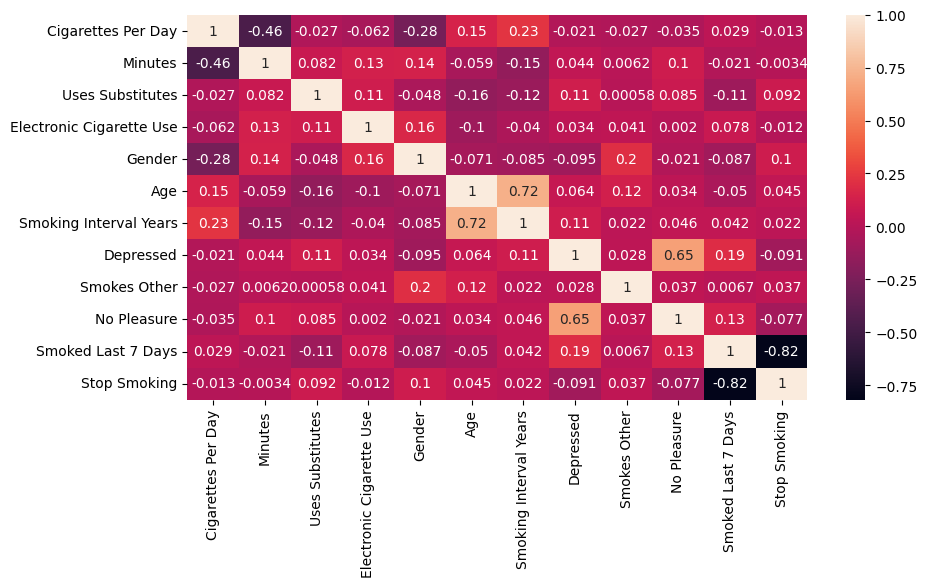

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.heatmap(data_resampled.corr(),annot=True)

<Axes: >

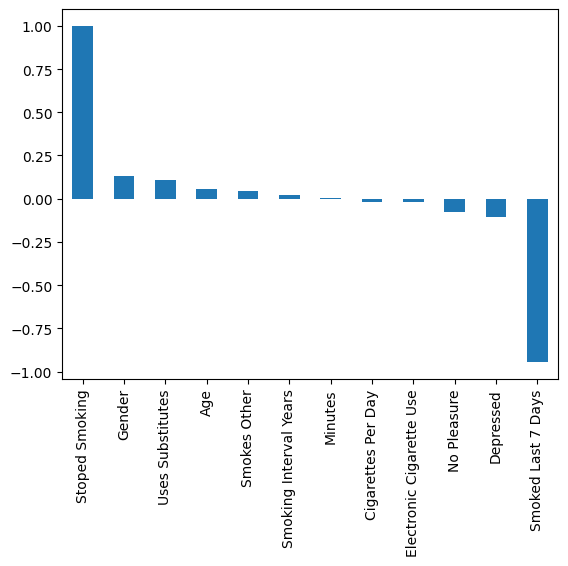

In [160]:
data_imputed.corr()['Stoped Smoking'].sort_values(ascending=False).plot(kind='bar')

In [161]:
from sklearn.preprocessing import OneHotEncoder

# Menginisialisasi OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Melakukan One-Hot Encoding pada fitur kategori
encoded_features = encoder.fit_transform(data_resampled[['Uses Substitutes', 'Electronic Cigarette Use', 'Gender', 'Depressed', 'Smokes Other', 'No Pleasure','Smoked Last 7 Days']])

# Membuat DataFrame baru dari hasil encoding
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Uses Substitutes', 'Electronic Cigarette Use', 'Gender', 'Depressed', 'Smokes Other', 'No Pleasure','Smoked Last 7 Days']))

# Menggabungkan DataFrame baru dengan DataFrame asli
df_encoded = pd.concat([data_resampled.drop(columns=['Uses Substitutes', 'Electronic Cigarette Use', 'Gender', 'Depressed', 'Smokes Other', 'No Pleasure','Smoked Last 7 Days']), encoded_df], axis=1)

df_encoded.head()

c:\Users\Asus\anaconda3\envs\py3.11-TF2.0\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Cigarettes Per Day,Minutes,Age,Smoking Interval Years,Stop Smoking,Uses Substitutes_1,Uses Substitutes_2,Electronic Cigarette Use_1,Electronic Cigarette Use_2,Electronic Cigarette Use_3,...,Depressed_1,Depressed_2,Smokes Other_1,Smokes Other_2,Smokes Other_3,Smokes Other_4,No Pleasure_1,No Pleasure_2,Smoked Last 7 Days_1,Smoked Last 7 Days_2
0,0.216667,0.107143,0.732143,0.436364,2,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.100000,0.178571,0.285714,0.327273,1,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.250000,0.017857,0.089286,0.127273,3,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.333333,0.011905,0.232143,0.381818,1,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.333333,0.005952,0.553571,0.618182,3,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Define features and target
X = df_encoded.drop(columns=['Stop Smoking'])
y = df_encoded['Stop Smoking']

# Split the df_encoded into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Random Forest model
rf_model = RandomForestClassifier(max_features='sqrt',n_estimators=200,min_samples_split=2,max_depth=20,min_samples_leaf=1)

# Perform the grid search
rf_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy with best parameters: {accuracy:.4f}')

Test Accuracy with best parameters: 0.9477


In [163]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.91692308 0.98461538 0.96615385 0.9845679  0.9691358 ]
Mean CV accuracy: 0.9642792022792024


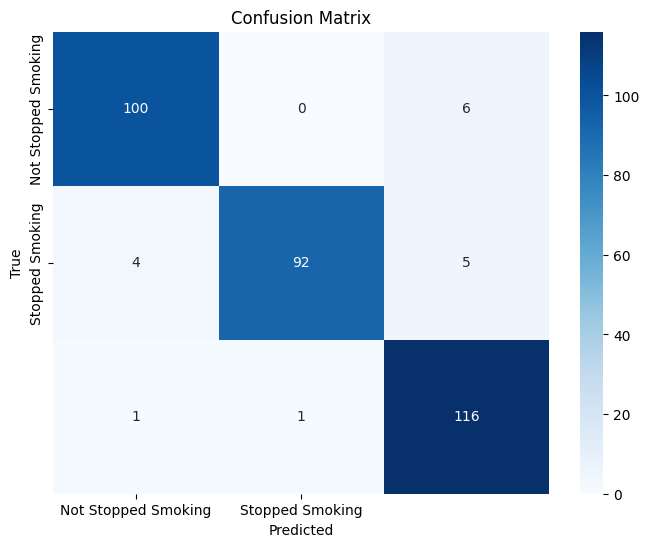

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

# Predict and evaluate the model
y_pred = rf_model.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Stopped Smoking', 'Stopped Smoking'], 
            yticklabels=['Not Stopped Smoking', 'Stopped Smoking'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [165]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Memisahkan fitur dan label
X = df_encoded.drop(columns=['Stop Smoking'])
y = df_encoded['Stop Smoking']

# Memisahkan data training dan testing
X_train, X_test, y_train, z = train_test_split(X, y, test_size=0.2, random_state=42)

# Konversi label ke one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train - 1)
y_test_one_hot = tf.keras.utils.to_categorical(y_test - 1)

In [182]:
# Membangun model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')])

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model
history = model.fit(X_train, y_train_one_hot, epochs=50, validation_data=(X_test, y_test_one_hot), batch_size=32)

# Evaluasi model
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)

Epoch 1/50
41/41 [==============================] - 1s 6ms/step - loss: 0.8914 - accuracy: 0.6171 - val_loss: 0.7162 - val_accuracy: 0.7231
Epoch 2/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6028 - accuracy: 0.7242 - val_loss: 0.5926 - val_accuracy: 0.7569
Epoch 3/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5240 - accuracy: 0.7558 - val_loss: 0.5578 - val_accuracy: 0.7723
Epoch 4/50
41/41 [==============================] - 0s 2ms/step - loss: 0.4898 - accuracy: 0.7689 - val_loss: 0.5361 - val_accuracy: 0.7815
Epoch 5/50
41/41 [==============================] - 0s 2ms/step - loss: 0.4619 - accuracy: 0.7912 - val_loss: 0.5161 - val_accuracy: 0.7754
Epoch 6/50
41/41 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.7982 - val_loss: 0.4948 - val_accuracy: 0.8000
Epoch 7/50
41/41 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8182 - val_loss: 0.4771 - val_accuracy: 0.7877
Epoch 8/50
41/41 [==

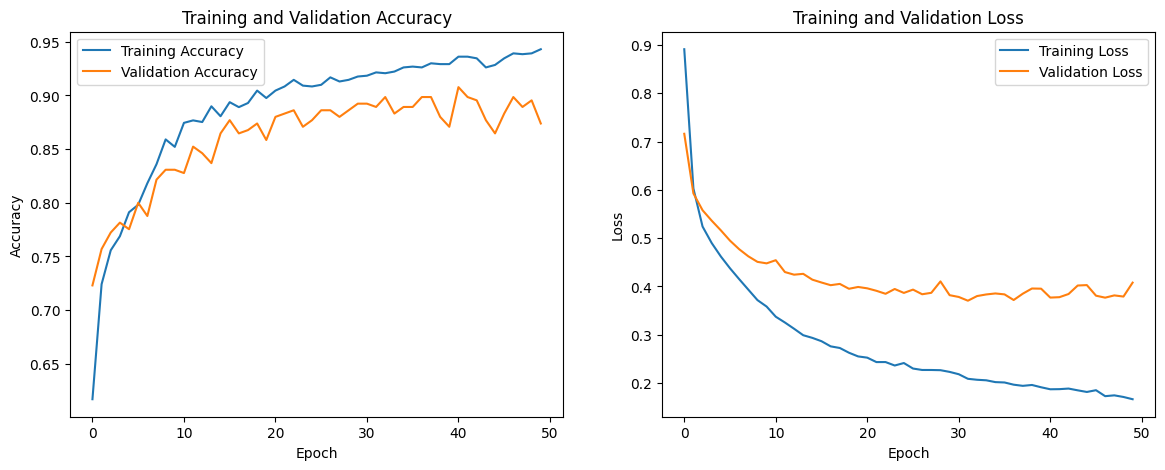

In [183]:
import matplotlib.pyplot as plt

# Memvisualisasikan akurasi
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Memvisualisasikan loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

In [184]:
model.save('unsmoke_model.h5')

c:\Users\Asus\anaconda3\envs\py3.11-TF2.0\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [185]:
# Memuat model
model = tf.keras.models.load_model('unsmoke_model.h5')

# Siapkan 10 set data baru dalam bentuk DataFrame
data_baru = pd.DataFrame({
    'Cigarettes Per Day': [10.0, 15.0, 12.0, 20.0, 8.0, 5.0, 18.0, 25.0, 6.0, 14.0],
    'Minutes': [80.0, 60.0, 100.0, 45.0, 120.0, 90.0, 30.0, 50.0, 70.0, 85.0],
    'Uses Substitutes_1': [1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0],
    'Uses Substitutes_2' : [0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0],
    'Electronic Cigarette Use_1': [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0],
    'Electronic Cigarette Use_2': [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
    'Electronic Cigarette Use_3': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'Electronic Cigarette Use_4': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'Gender_1': [1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0],
    'Gender_2': [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0],
    'Age': [30.0, 45.0, 55.0, 60.0, 35.0, 50.0, 40.0, 28.0, 38.0, 48.0],
    'Smoking Interval Years': [10.0, 20.0, 30.0, 40.0, 15.0, 25.0, 18.0, 22.0, 12.0, 35.0],
    'Depressed_1': [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0],
    'Depressed_2': [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
    'Smokes Other_1': [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
    'Smokes Other_2': [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0],
    'Smokes Other_3': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'Smokes Other_4': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'No Pleasure_1': [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0],
    'No Pleasure_2': [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0],
    'Smoked Last 7 Days_1': [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0],
    'Smoked Last 7 Days_2': [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
})

# Konversi DataFrame ke array numpy
data_array = data_baru.to_numpy()

# Lakukan prediksi untuk setiap data baru dan tampilkan hasilnya
for i, data in enumerate(data_array):
    prediction = model.predict(data.reshape(1, -1))
    confidence = max(prediction[0]) if len(prediction[0]) > 1 else prediction[0][0]
    predicted_class = prediction[0].argmax() if len(prediction[0]) > 1 else (1 if prediction[0][0] > 0.5 else 0)
    print(f"Data point {i + 1}: Predicted Class = {predicted_class}, Confidence = {confidence:.4f}")


1/1 [==============================] - 0s 48ms/step
Data point 1: Predicted Class = 2, Confidence = 1.0000
1/1 [==============================] - 0s 16ms/step
Data point 2: Predicted Class = 2, Confidence = 1.0000
1/1 [==============================] - 0s 21ms/step
Data point 3: Predicted Class = 2, Confidence = 1.0000
1/1 [==============================] - 0s 20ms/step
Data point 4: Predicted Class = 0, Confidence = 0.9999
1/1 [==============================] - 0s 19ms/step
Data point 5: Predicted Class = 2, Confidence = 1.0000
1/1 [==============================] - 0s 17ms/step
Data point 6: Predicted Class = 2, Confidence = 0.5164
1/1 [==============================] - 0s 17ms/step
Data point 7: Predicted Class = 2, Confidence = 1.0000
1/1 [==============================] - 0s 18ms/step
Data point 8: Predicted Class = 2, Confidence = 1.0000
1/1 [==============================] - 0s 19ms/step
Data point 9: Predicted Class = 2, Confidence = 1.0000
1/1 [==============================] 